**Final Project GAN Music Creation**

Loading the Dataset

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# tfds works in both Eager and Graph modes
#tf.enable_eager_execution()

# Load the full GMD with MIDI only (no audio) as a tf.data.Dataset
dataset = tfds.load(
    name="groove/full-midionly",
    split=tfds.Split.TRAIN,
    try_gcs=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
DRUM_CLASSES = [
   'Kick',
   'Snare',
   'Hi-hat closed',
   'Hi-hat open',
   'Tom',
   'Tambourine/Timbale', 
   'Cymbal',
   'Percussion',
   'Clap',
]

MIDI_DRUM_MAP = {
     36: 0,
     38: 1,
     40: 1,
     37: 1,
     48: 5,
     50: 6,
     45: 4,
     47: 5,
     43: 4,
     58: 4,
     46: 3,
     26: 3,
     42: 2,
     22: 2,
     44: 2,
     49: 7,
     55: 7,
     57: 7,
     52: 7,
     51: 8,
     59: 8,
     53: 8 
 }

## if you want to use reddit dataset, uncomment this
#MIDI_DRUM_MAP = {
#    36: 0,
#    35: 0,
#    38: 1,
#    40: 1,
#    42: 2, # closed hihat
#    44: 3, # pedal hihat
#    46: 3, # open hihat
#    41: 4, # low floor tom
#    43: 4, # high floor tom
#    45: 4, # low tom
#    47: 4, # low-mid tom
#    48: 4, # high-mid tom
#    50: 4, # high tom
#    53: 4,  # Ride Bell
#    54: 5, # tambourine 
#    66: 5, # low timbale
#    49: 6, # crash symbal 1
#    51: 6, # ride  cymbal 1
#    57: 6, # crash symbal 2
#    59: 6, # ride cymbal 2
#    67: 7, # high agogo
#    58: 7, # low agogo
#    69: 7, # cabasa
#    70: 7, # maracas
#    60: 7, # hi bongo
#    61: 7, # low bongo
#    62: 7, # mute hi congo
#    63: 7, # open hi congo
#    64: 7, # low conga
#    37: 7, # side stick
#    39: 8, # hand clap
#}


DRUM_MIDI_MAP = [ # pianoroll to MIDI - reverse
    36, # 0 Kick / Bass Drum 1
    40, # 1 Snare / Electric Snare
    42, # 2 Hihat Closed
    46, # 3 Hihat Open
    47, # 4 Tom  / Low-mid Tom
    66, # 5 Low Timbale
    51, # 6 Cymbal
    63, # 7 Percussion / Open Hi Conga
    39  # 8 Clap
]
    

In [5]:
from glob import glob
import os

#os.environ["CUDA_VISIBLE_DEVICES"] = '0'


#filepaths = glob("./drive/MyDrive/groove/*/*/*beat_4-4.mid")
filepaths = glob("C:/Users/Léon Dankert/Downloads/groove/*/*/*beat_4-4.mid")
#filepaths = glob("./drive/MyDrive/groove/*/*/*.mid")
#filepaths = glob("./midi_dataset/gm_reddit/GM MIDI Pack/GM - Electronic/*/*/*.mid")
#filepaths.extend(filepaths2)

print(len(filepaths))

# remove "fill" rhythms
filepaths = [path for path in filepaths if "fill" not in path]
print(len(filepaths))

resolution  = 4 # separate quater into 4  = 16 notes per bar

nb_bars = 2 

len_seq = resolution * 4 * nb_bars # length of drumloops in training data - 2 bars
    
nb_notes = len(DRUM_CLASSES) # number of possible MIDI notes  - max_drum_note - min_drum_note
#nb_notes = 6

491
491


In [7]:
def dublicate_multiple_styles(data):
  dublicated_datas = pd.DataFrame()
  styles = data.style.split("/")
  for style in styles:
    dublicated_data = data
    dublicated_data["style"] = style
    dublicated_datas = dublicated_datas.append(dublicated_data, ignore_index=True)
  return dublicated_datas

In [17]:
!pip install pandas
import pandas as pd

dataset = pd.read_csv("C:/Users/Léon Dankert/Downloads/groove/info.csv")

#dataset = dataset[dataset.beat_type == "beat"]

print(dataset["style"].value_counts())

dataset_cleaned = pd.DataFrame()
for i,row in dataset.iterrows():
  dataset_cleaned = dataset_cleaned.append(dublicate_multiple_styles(row))

#dataset_cleaned['midi_filename'] = "./drive/MyDrive/groove/" + dataset_cleaned["midi_filename"]
dataset_cleaned['midi_filename'] = "C:/Users/Léon Dankert/Downloads/groove/" + dataset_cleaned["midi_filename"]
dataset_cleaned = dataset_cleaned[dataset_cleaned.beat_type != "fill"]

#print(dataset_cleaned.head())
print(dataset_cleaned["style"].value_counts().tail(20))
#print(dataset_cleaned.head())


dataset_train = dataset_cleaned[dataset_cleaned.split == "train"]
dataset_validation = dataset_cleaned[dataset_cleaned.split == "validation"]
dataset_test = dataset_cleaned[dataset_cleaned.split == "test"]

print("Training dataset")
print(dataset_train["style"].value_counts().head())
print("Validation dataset")
print(dataset_validation["style"].value_counts().head())
print("Test dataset")
print(dataset_test["style"].value_counts().head())

TOP_GENRE = ["rock","funk","latin","jazz","hiphop"]

You should consider upgrading via the 'c:\users\léon dankert\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.
C:\Users\Léon Dankert\AppData\Local\Temp\ipykernel_936\906994634.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dublicated_datas = dublicated_datas.append(dublicated_data, ignore_index=True)
C:\Users\Léon Dankert\AppData\Local\Temp\ipykernel_936\906994634.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dublicated_datas = dublicated_datas.append(dublicated_data, ignore_index=True)
C:\Users\Léon Dankert\AppData\Local\Temp\ipykernel_936\1998704543.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_cleaned = dataset_cleaned.append(dublicate_multiple_styles(row))

rock                       281
hiphop                      91
funk                        77
punk                        58
neworleans/funk             48
                          ... 
middleeastern                1
latin/bomba                  1
latin/merengue               1
rock/rockabilly              1
latin/venezuelan-joropo      1
Name: style, Length: 76, dtype: int64


C:\Users\Léon Dankert\AppData\Local\Temp\ipykernel_936\1998704543.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_cleaned = dataset_cleaned.append(dublicate_multiple_styles(row))
C:\Users\Léon Dankert\AppData\Local\Temp\ipykernel_936\906994634.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dublicated_datas = dublicated_datas.append(dublicated_data, ignore_index=True)
C:\Users\Léon Dankert\AppData\Local\Temp\ipykernel_936\906994634.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dublicated_datas = dublicated_datas.append(dublicated_data, ignore_index=True)
C:\Users\Léon Dankert\AppData\Local\Temp\ipykernel_936\1998704543.py:12: FutureWarning: The frame.append method is deprecated and will be removed fro

rockabilly             1
venezuelan-joropo      1
slow                   1
halftime               1
purdieshuffle          1
chacha                 1
brazilian-frevo        1
ando                   1
dominican-merengue     1
venezuelan-sangueo     1
venezuelan-merengue    1
reggaeton              1
middleeastern          1
gospel                 1
rhumba                 1
merengue               1
folk                   1
bomba                  1
klezmer                1
bembe                  1
Name: style, dtype: int64
Training dataset
rock      174
jazz       41
funk       40
latin      40
hiphop     26
Name: style, dtype: int64
Validation dataset
rock     17
latin    10
funk      6
pop       5
jazz      5
Name: style, dtype: int64
Test dataset
rock      21
soul      18
funk      17
hiphop     7
pop        4
Name: style, dtype: int64


C:\Users\Léon Dankert\AppData\Local\Temp\ipykernel_936\906994634.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dublicated_datas = dublicated_datas.append(dublicated_data, ignore_index=True)
C:\Users\Léon Dankert\AppData\Local\Temp\ipykernel_936\1998704543.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_cleaned = dataset_cleaned.append(dublicate_multiple_styles(row))
C:\Users\Léon Dankert\AppData\Local\Temp\ipykernel_936\906994634.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dublicated_datas = dublicated_datas.append(dublicated_data, ignore_index=True)
C:\Users\Léon Dankert\AppData\Local\Temp\ipykernel_936\1998704543.py:12: FutureWarning: The frame.append method is deprecated and will be removed fro

In [19]:
!pip install pretty_midi
!pip install joblib
!pip install matplotlib

import random
import numpy as np
import os
import joblib
import pretty_midi
import glob


import matplotlib.pyplot as plt
%matplotlib inline


def plot_drum_matrix(a):
    if a is not None:
        a = np.transpose(np.squeeze(a))
        plt.matshow(a)
        plt.show()  

You should consider upgrading via the 'c:\users\léon dankert\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\léon dankert\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\léon dankert\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


656 C:/Users/Léon Dankert/Downloads/groove/drummer1/session1/48_jazz_93_beat_4-4.mid
(33, 64, 9)
(33,)


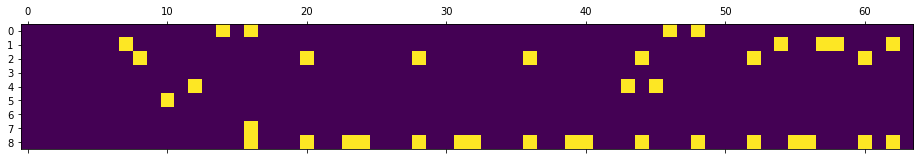

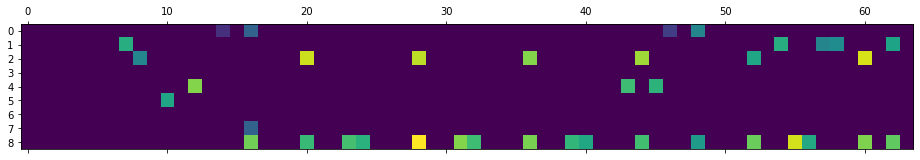

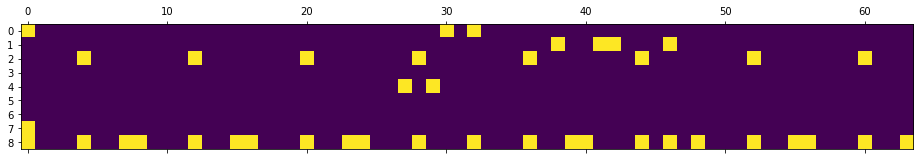

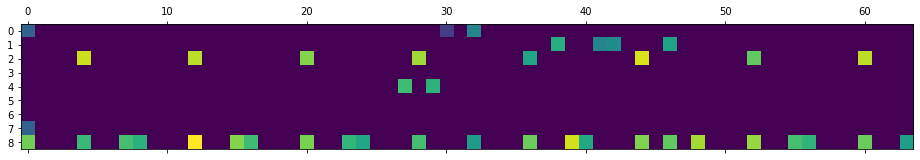

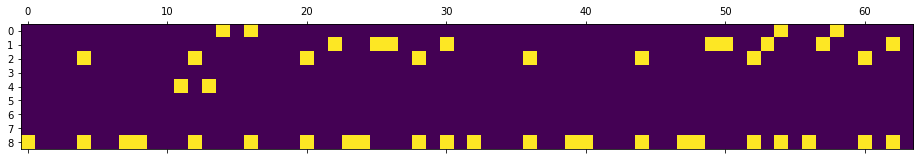

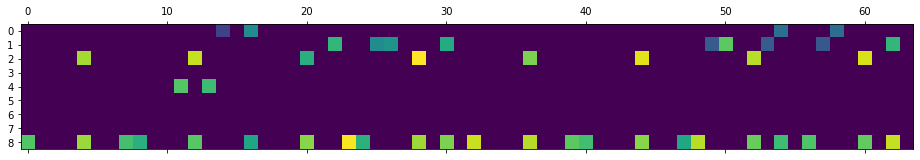

In [76]:
#nb_notes = 128

# ignore drum loops with onsets less than MIN_NB_ONSETS
MIN_NB_ONSETS = 5


# unit timestep = 16th note
def get_pianomatrices_of_drums(midi_file, is_drum=True):
    found = False
    genre_id = -1
    
    # is it in selected genres?
    #genre = get_genre_from_path(midi_file)
    #if genre not in GENRES:
    #    return None
    #genre_id = GENRES.index(genre)

    onsets, velocities, timeshifts, durations, genre_ids = [], [], [], [], []
        
    # load midi file
    try:
        pm = pretty_midi.PrettyMIDI(midi_file = midi_file)
    except:
        print("Failed to load midi: ", midi_file)
        return None
        #return(onsets,velocities, timeshifts, durations, genre_ids)
        
    # get timiming of quater notes
    # Grundschlag als beat locations in seconds
    beats = pm.get_beats()
    
    # make it to 16th notes
    beats_ticks = [] # converting to ticks
    
    # für jeden Grundschlag (len(baats)) mit resolution 
    for i in range((len(beats) +1)* 4):
        beats_ticks.append(i * pm.resolution / 4)
    
    num_notes16 = len(beats_ticks)
    print(num_notes16, midi_file)
    
    # maximum duration of one note
    max_duration = 2.0 # 2 quater notes

    # convert ticks to index of 16th note
    def find_note_index(tick, beats_ticks):
        return (np.abs(beats_ticks - tick)).argmin()
    
    def get_offset(beats_ticks, grid_id, note_start):
        grid_start = beats_ticks[grid_id]
        tick_diff = note_start - grid_start
        tick_grid = pm.resolution / resolution * 0.5 # half of 16th note = 32nd note
        diff_coef= tick_diff / tick_grid   # coef to a half of 16th note
        return diff_coef
        
    # # of notes
    notes_length = 4 * nb_bars * resolution *2

    # create pianoroll matrix (resolution: 16th note))
    onsets, velocities, timeshifts, durations, genre_ids = [], [], [], [], []
    
    # list for not found notes
    missing_notes = []
    for instrument in pm.instruments:
#         if instrument.is_drum == is_drum or 1:
        for note_start in range(0, num_notes16 - 16, 16): # hopsize = 1bar = 16 16th notes
            onset = np.zeros((notes_length, nb_notes), dtype='float') 
            velocity = np.zeros((notes_length, nb_notes), dtype='float') 
            timeshift = np.zeros((notes_length, nb_notes), dtype='float')
            duration = np.zeros((notes_length, nb_notes), dtype='float')

            for note in instrument.notes:
                idx_start = find_note_index(pm.time_to_tick(note.start), beats_ticks)
                diff_coef = get_offset(beats_ticks, idx_start, pm.time_to_tick(note.start))

                if note_start <= idx_start and idx_start < note_start + notes_length:
                    if note.pitch in MIDI_DRUM_MAP:
                        drum_note = MIDI_DRUM_MAP[note.pitch]

                        onset[idx_start - note_start, drum_note] = 1
                        velocity[idx_start - note_start, drum_note]  = note.velocity / 127.
                        timeshift[idx_start - note_start, drum_note] = diff_coef

                        dur = (pm.time_to_tick(note.end) - pm.time_to_tick(note.start))/ (pm.resolution / 4)
                        dur = min(1.0, max(0, dur / max_duration))
                        duration[idx_start - note_start, drum_note] = dur
                    else:
                      if note.pitch not in missing_notes:
                        missing_notes.append(note.pitch)

            if np.sum(onset > 0.) >= MIN_NB_ONSETS:
                # ignore the last part of the midi file where rhythm ends in the first bar
                if np.sum(onset[notes_length//2:,:]) > 0: 
                    onsets.append(onset)
                    velocities.append(velocity)
                    timeshifts.append(timeshift)
                    durations.append(duration)
                    genre_ids.append(genre_id)

    if missing_notes != []:
      print(f"The following notes aren't initilized {missing_notes}")


    onsets = np.array(onsets)
    velocities = np.array(velocities)
    timeshifts = np.array(timeshifts)
    durations = np.array(durations)
    genre_ids = np.array(genre_ids)
    
    return (onsets,velocities, timeshifts, durations, genre_ids)
    
#print(dataset_cleaned["midi_filename"].iloc[100])
midi_file = dataset_cleaned["midi_filename"].iloc[50]
#midi_file = "./drive/MyDrive/groove/" + midi_file
onsets, velocities, timeshifts, duration, genre_ids = get_pianomatrices_of_drums(midi_file)    

# sample
print (timeshifts.shape)
print (genre_ids.shape)

for i in range(min(3,len(onsets))):
#for i in range(len(onsets)):
#    print(i)
    plot_drum_matrix(onsets[i])
#    print(timeshifts[i])
    plot_drum_matrix(velocities[i])
#    plot_drum_matrix(timeshifts[i])
#    plot_drum_matrix(duration[i])

In [55]:
test_midi = dataset_cleaned.midi_filename.iloc[101]
test_midi = pretty_midi.PrettyMIDI(test_midi)
for instrument in test_midi.instruments:
    print(instrument.get_onsets())
    for note in instrument.notes:
        print(note)

[  2.39772663   2.52982887   2.6093743  ... 198.34937892 198.36926528
 198.37210619]
Note(start=2.397727, end=2.498579, pitch=38, velocity=26)
Note(start=2.529829, end=2.609374, pitch=38, velocity=43)
Note(start=2.609374, end=2.630681, pitch=38, velocity=48)
Note(start=2.701704, end=2.711647, pitch=38, velocity=61)
Note(start=2.713067, end=2.813920, pitch=36, velocity=76)
Note(start=3.085226, end=3.153408, pitch=38, velocity=29)
Note(start=3.153408, end=3.187499, pitch=38, velocity=33)
Note(start=3.213067, end=3.255681, pitch=38, velocity=36)
Note(start=3.291192, end=3.313920, pitch=38, velocity=43)
Note(start=3.338067, end=3.384942, pitch=38, velocity=29)
Note(start=3.384942, end=3.390624, pitch=38, velocity=65)
Note(start=3.376420, end=3.477272, pitch=36, velocity=59)
Note(start=3.710226, end=3.794033, pitch=38, velocity=31)
Note(start=3.794033, end=3.811079, pitch=38, velocity=41)
Note(start=3.889204, end=3.896306, pitch=38, velocity=44)
Note(start=3.968749, end=3.990056, pitch=38, 

148 C:/Users/Léon Dankert/Downloads/groove/drummer4/session1/4_latin-brazilian_92_beat_4-4.mid
480 C:/Users/Léon Dankert/Downloads/groove/drummer4/session1/5_latin-brazilian_184_beat_4-4.mid
436 C:/Users/Léon Dankert/Downloads/groove/drummer5/session2/2_latin-brazilian_101_beat_4-4.mid
696 C:/Users/Léon Dankert/Downloads/groove/drummer5/session2/3_latin-brazilian_101_beat_4-4.mid
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


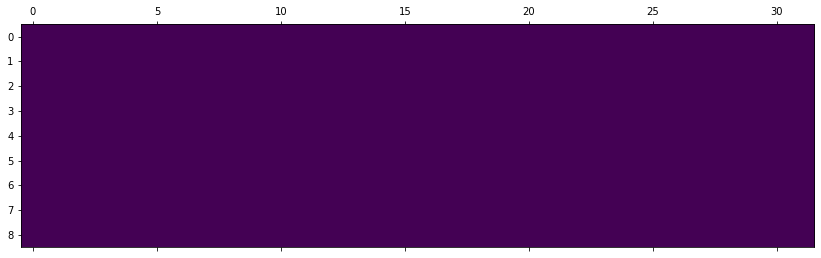

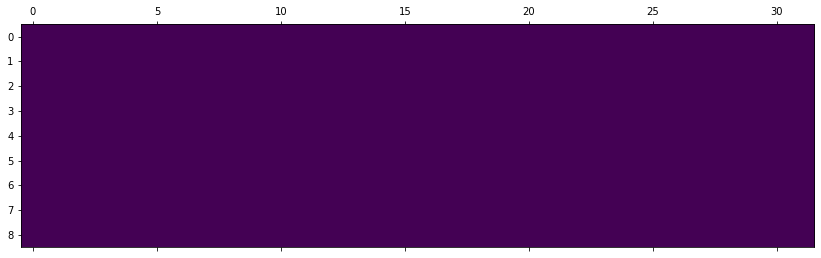

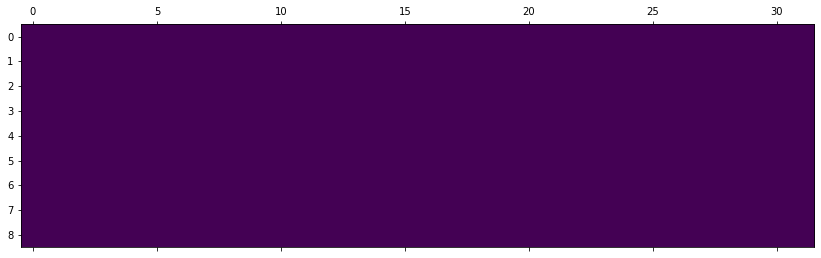

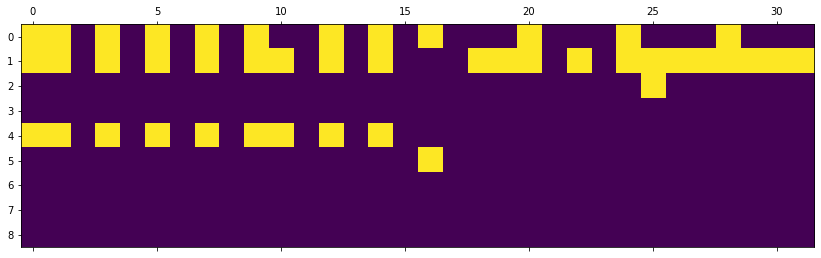

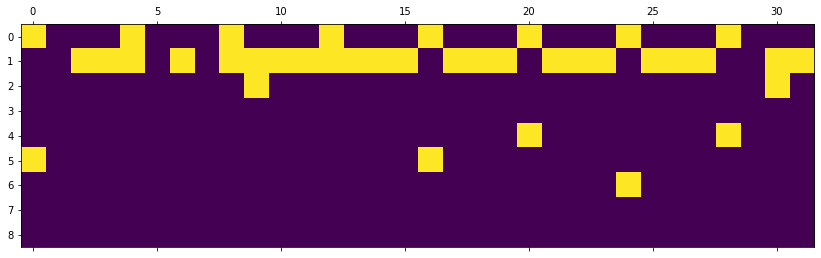

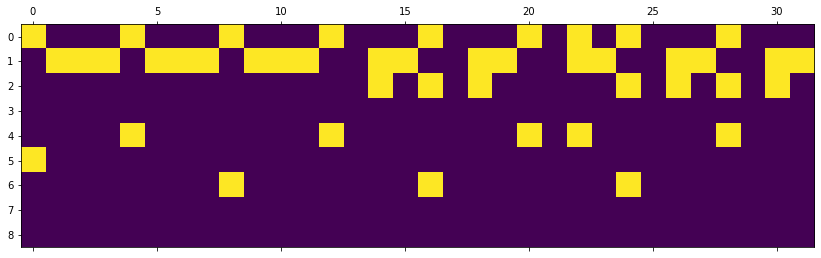

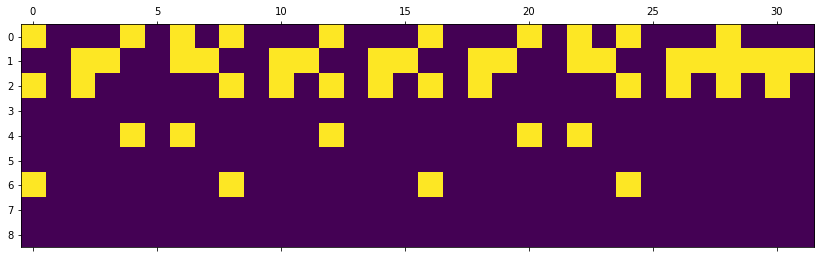

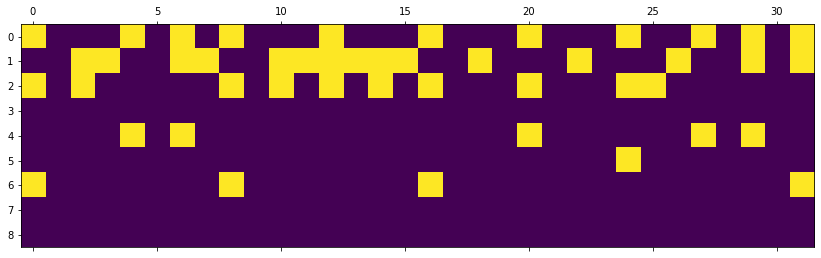

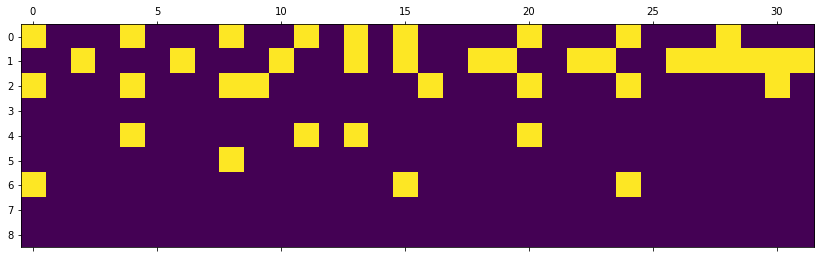

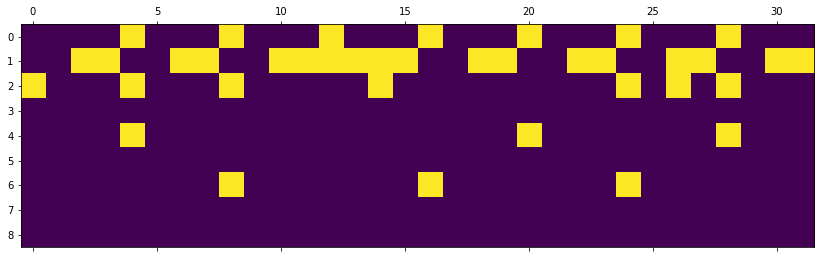

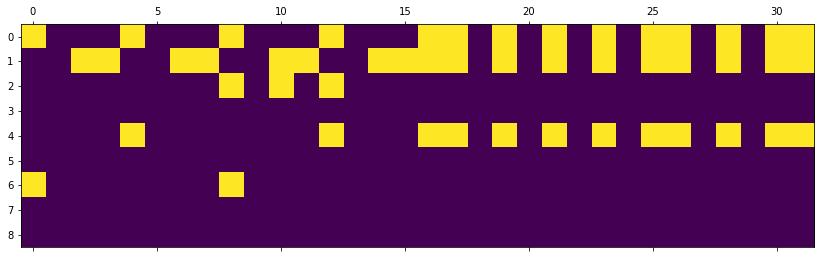

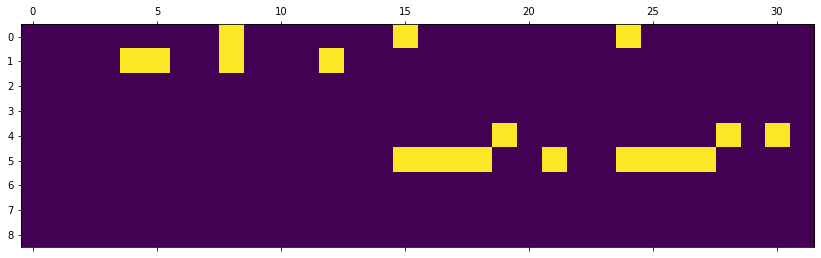

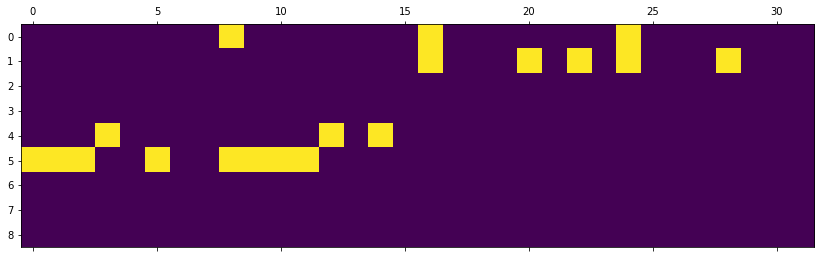

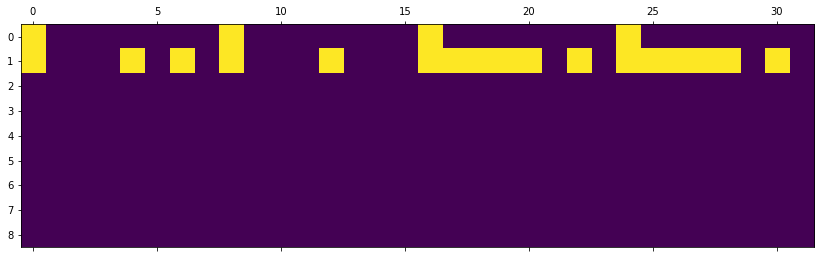

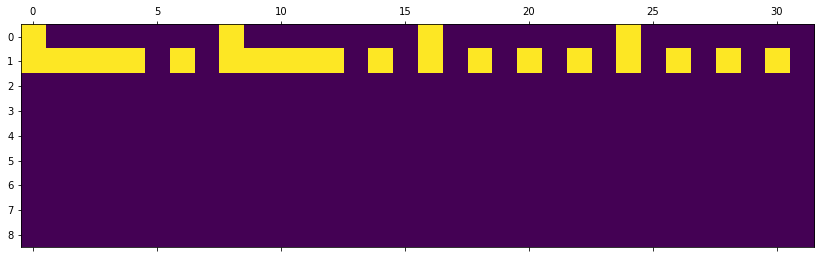

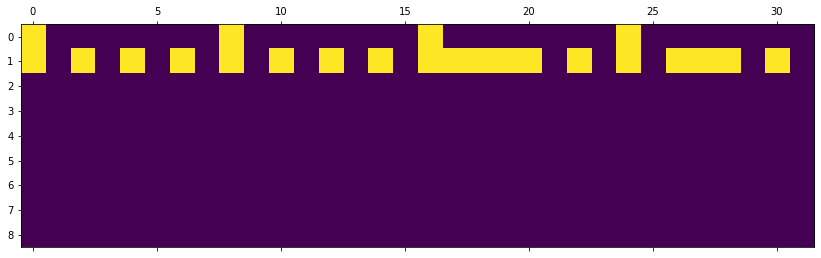

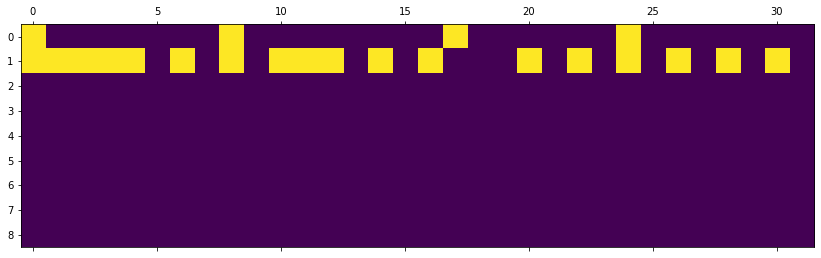

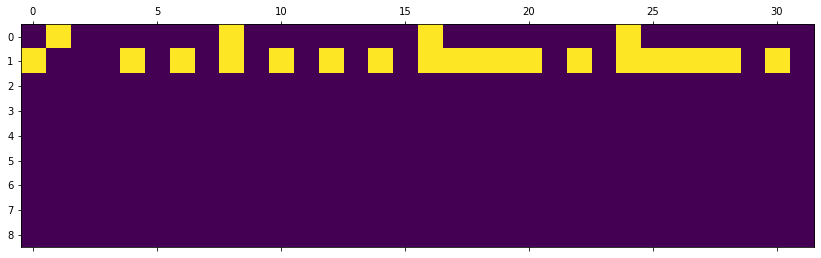

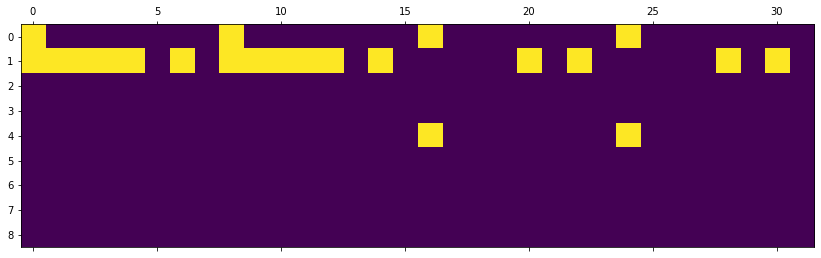

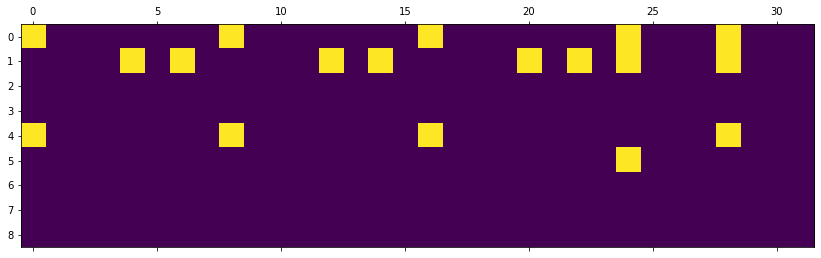

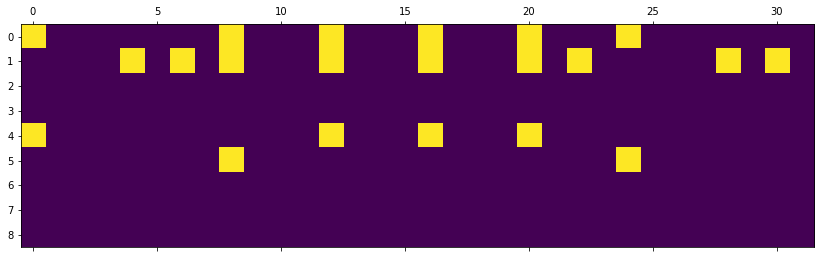

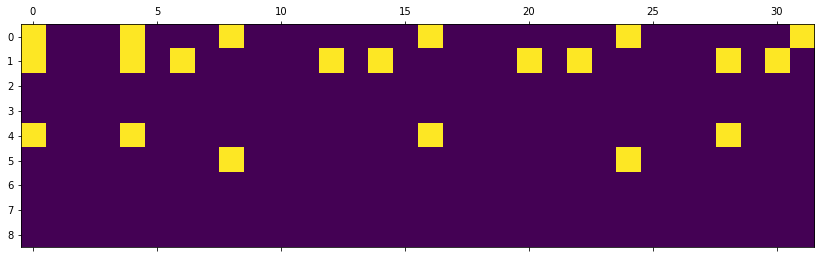

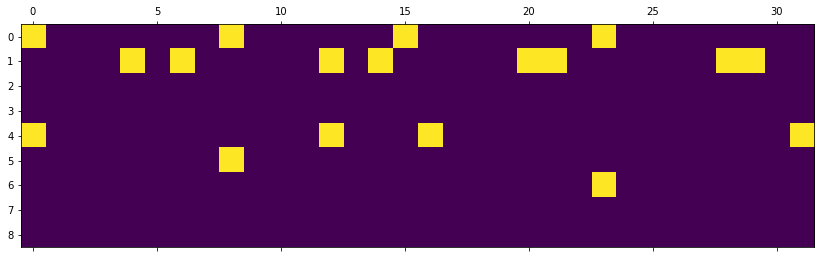

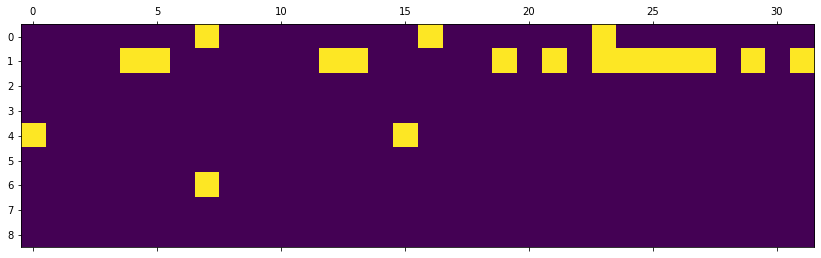

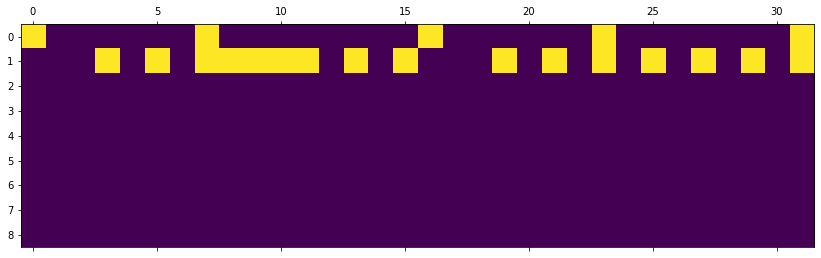

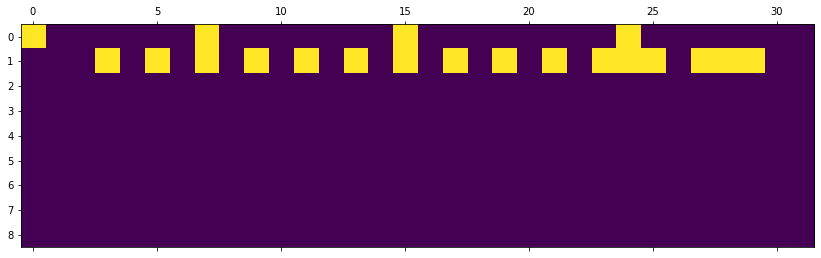

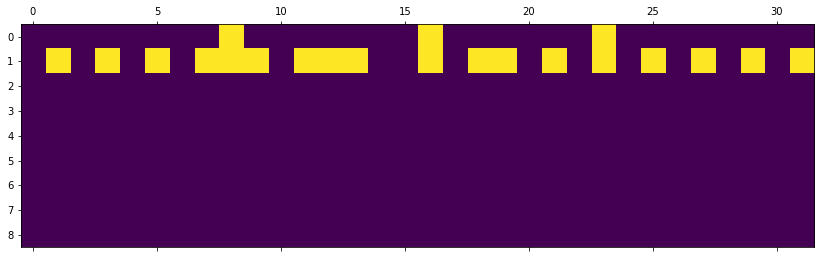

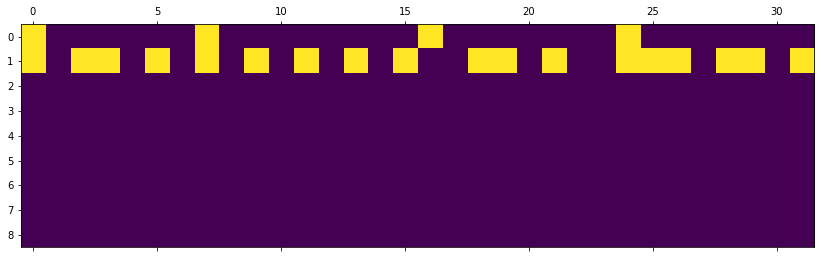

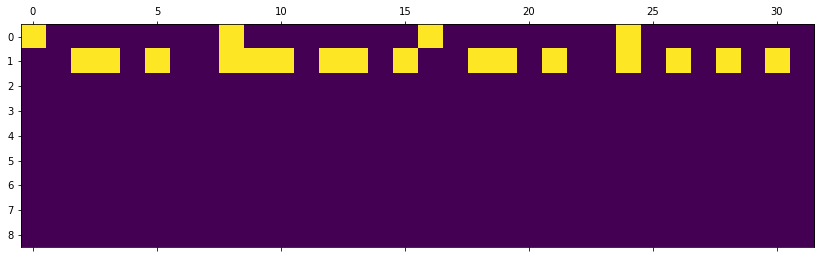

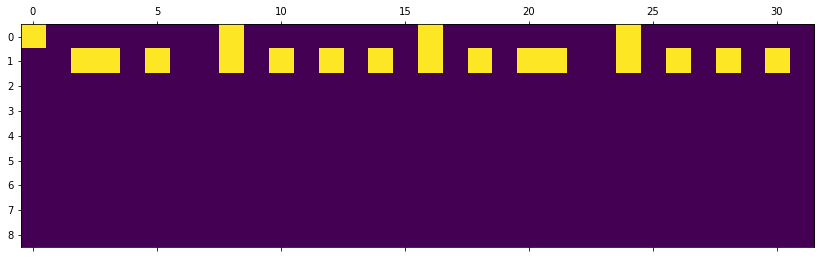

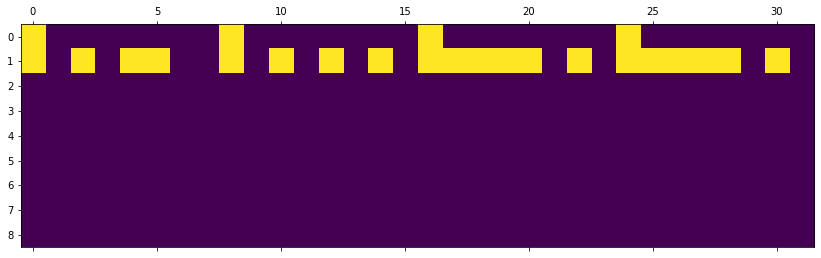

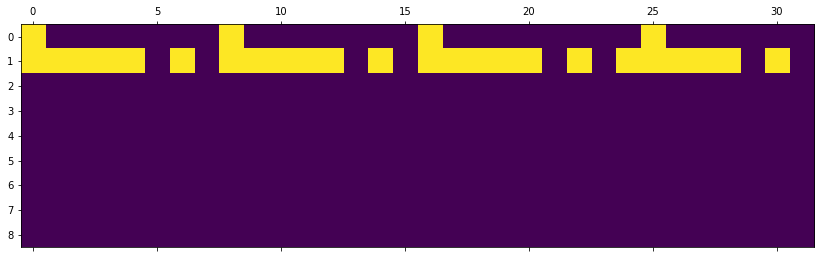

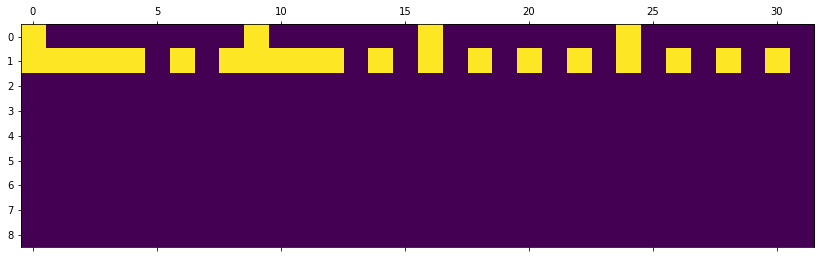

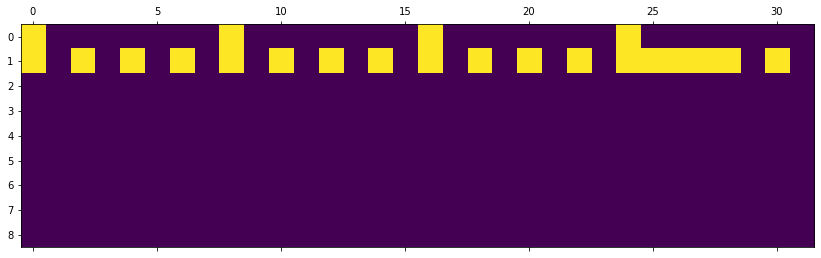

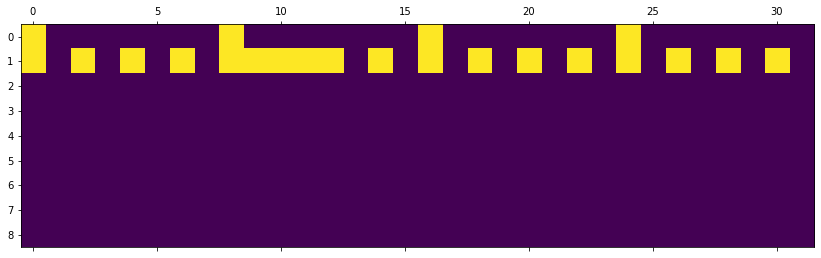

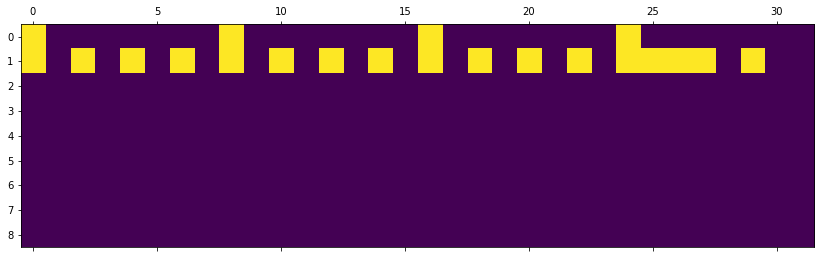

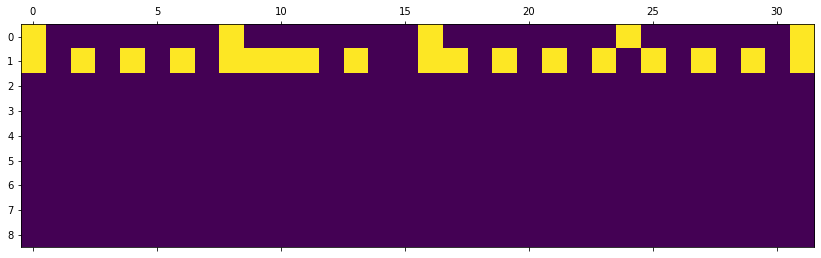

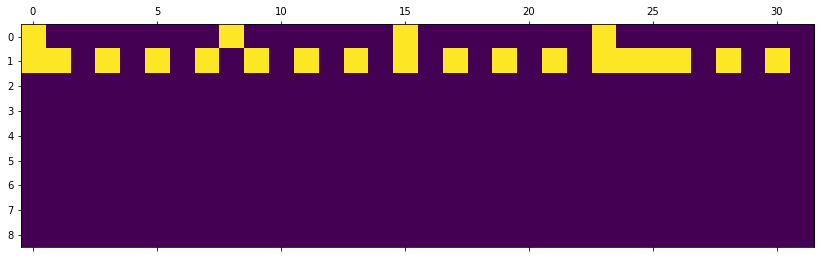

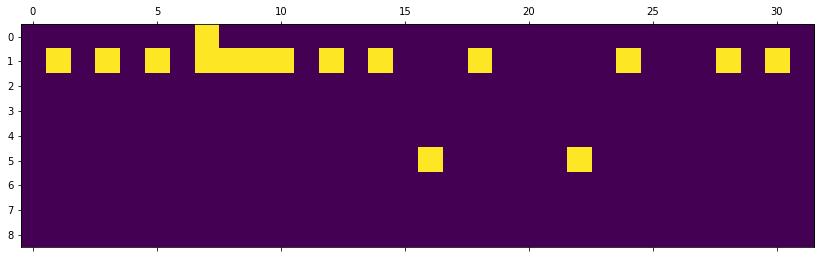

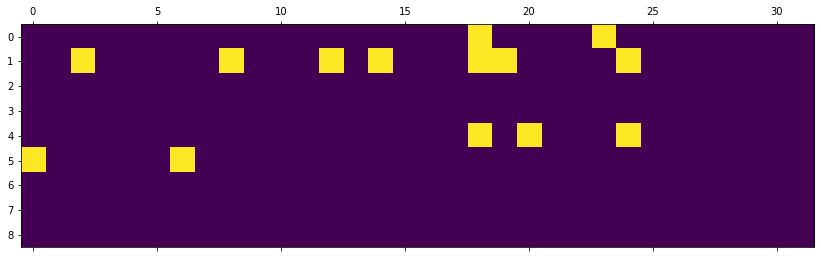

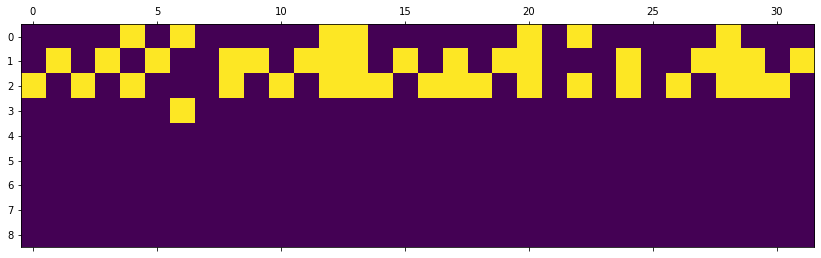

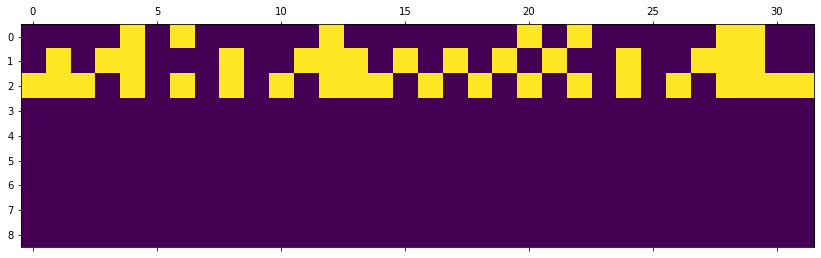

KeyboardInterrupt: 

In [64]:
notes_length = 4 * nb_bars * resolution
onsets = np.zeros((3, notes_length, nb_notes), dtype='float') 

counter = 0
for midi_filepath in dataset_cleaned[dataset_cleaned["style"] == "brazilian"].midi_filename:
  onset, velocities, timeshifts, duration, genre_ids = get_pianomatrices_of_drums(midi_filepath)
  #for i in range(min(3, len(onset))):
   # plot_drum_matrix(onset[i])
  onsets = np.append(onsets, onset, axis=0)
#print(np.mean(velocities,axis=0))
print(genre_ids)
#print(np.mean(np.mean(onsets,axis=1), axIis=0))

for i in range(len(onsets)):
  plot_drum_matrix(onsets[i])



#print(dataset_cleaned[dataset_cleaned["style"] == "pop"].midi_filename)